In [2]:
import numpy as np
import time

In [3]:
#Counting Sort (Works only for positive integers)
def count_sort(arr):
    max_element = int(max(arr))
    min_element = int(min(arr))
    k = max_element - min_element + 1
    count_arr = [[] for _ in range(k)]
    output = []
    for i in range(0,len(arr)):
      count_arr[arr[i]-min_element].append(arr[i])
    for j in range(0,k):
      output.extend(count_arr[j])
    return np.asarray(output)

In [4]:
#Radix Sort
def radix_sort(nums):
    RADIX = 10
    placement = 1
    max_digit = max(nums)

    while placement < max_digit:
      buckets = [list() for _ in range( RADIX )]
      for i in nums:
        tmp = int((i / placement) % RADIX)
        buckets[tmp].append(i)
        #print(placement,buckets,i)
      a = 0
      for b in range( RADIX ):
        buck = buckets[b]
        for i in buck:
          nums[a] = i
          a += 1
          #print(buck,placement,nums,i)
      placement *= RADIX
    return nums

In [5]:
#test array
A = np.random.randint(0,100,10)

In [6]:
A

array([ 9, 13,  8, 60, 28, 60, 19, 10,  4,  8])

In [7]:
a = count_sort(A)
b = radix_sort(A)
print(a,b)

[ 4  8  8  9 10 13 19 28 60 60] [ 4  8  8  9 10 13 19 28 60 60]


In [8]:
#Performance plots
def method(method,size,max_input_size):
  variants = len(range(10,max_input_size,1))
  B = np.zeros((variants,size))
  #Plot performance of binary search
  for i in range(size-1):
    count = 0
    for n in range(10,max_input_size,1):
      A = np.random.randint(0,100,n)
      start = time.time()
      method(A)
      end = time.time()
      B[count,0] = n
      B[count,i+1] = end-start
      count = count+1
  return B

In [9]:
size=10
max_input_size = 500
B1 = method(count_sort,size,max_input_size)
B2 = method(radix_sort,size,max_input_size)
variants = len(range(10,max_input_size,1))

In [10]:
C = np.zeros((variants,4))
C[:,0] = B1[:,0]
C[:,1] = np.mean(B1[:,1:size-1],axis=1)*1000
C[:,2] = np.mean(B2[:,1:size-1],axis=1)*1000

Text(0.5, 1.0, 'Count Sort vs Radix Sort Performance')

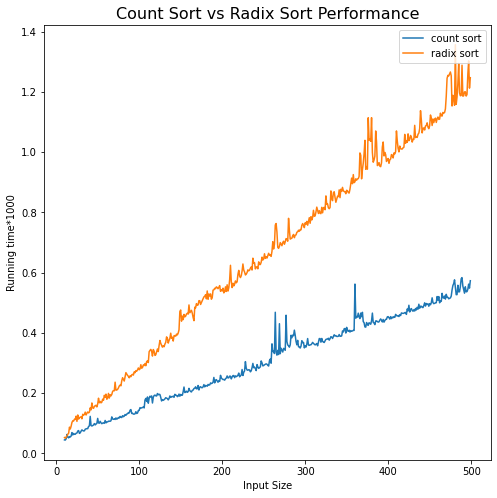

In [11]:
#Plot Performance vs Input Size
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(C[:,0],C[:,1],label = 'count sort')
plt.plot(C[:,0],C[:,2],label = 'radix sort')
plt.xlabel('Input Size')
plt.ylabel('Running time*1000')
plt.legend(loc="upper right")
plt.title('Count Sort vs Radix Sort Performance',fontsize=16)